# <b>heatmap</b>

This section provides examples of how to use the <b>heatmap</b> function.  At a minimum, the `heatmap` function requires the following keywords:
* `df`: a pandas DataFrame
* `x`: the name of the DataFrame column containing the x-axis data
* `y`: the name of the DataFrame column containing the y-axis data
* `z`: the name of the DataFrame column containing the z-axis data

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import fivecentplots as fcp
import pandas as pd
import numpy as np
import os, sys, pdb
osjoin = os.path.join
st = pdb.set_trace

### Sample data

In [2]:
df = pd.read_csv(osjoin(os.path.dirname(fcp.__file__), 'tests', 'fake_data_contour.csv'))
df.head()

,Experiment,Batch,X,Y,Value
0,Control,101,1,-4,3.5
1,Control,101,1,-2,2.1
2,Control,101,1,0,3.3
3,Control,101,1,2,3.2
4,Control,101,1,4,4.0


### Set theme

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

### Other

In [4]:
SHOW = False

## Basic heatmap

In [31]:
df[(df.Batch==103)&(df.Experiment=="No Nitride")]

,Experiment,Batch,X,Y,Value
63,No Nitride,103,1,-4,12.1
64,No Nitride,103,1,-2,15.3
65,No Nitride,103,1,0,15.2
66,No Nitride,103,1,2,14.5
67,No Nitride,103,1,4,13.5
68,No Nitride,103,-2,0,12.6
69,No Nitride,103,-2,6,13.6
70,No Nitride,103,-2,-4,14.3
71,No Nitride,103,3,4,17.6
72,No Nitride,103,5,1,14.5


Value vs Y vs X by Batch by Experiment.png


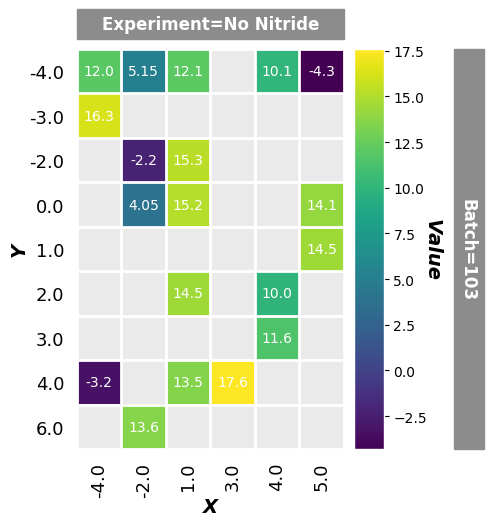

In [194]:
fcp.heatmap(df=df, x='X', y='Y', z='Value', row='Batch', col='Experiment', 
            cbar=True, show=True, tick_labels_major_x_rotation=90, 
            heatmap_labels=True,
            rc_label_font_size=12, filter='Batch==103 & Experiment=="No Nitride"',
            ax_edge_color='#ffffff', heatmap_edge_width=2)
# rename heatmap_labels
# think about all label kwargs
# cmap support for heatmap

## Filled contour

Value vs Y vs X by Batch by Experiment.png


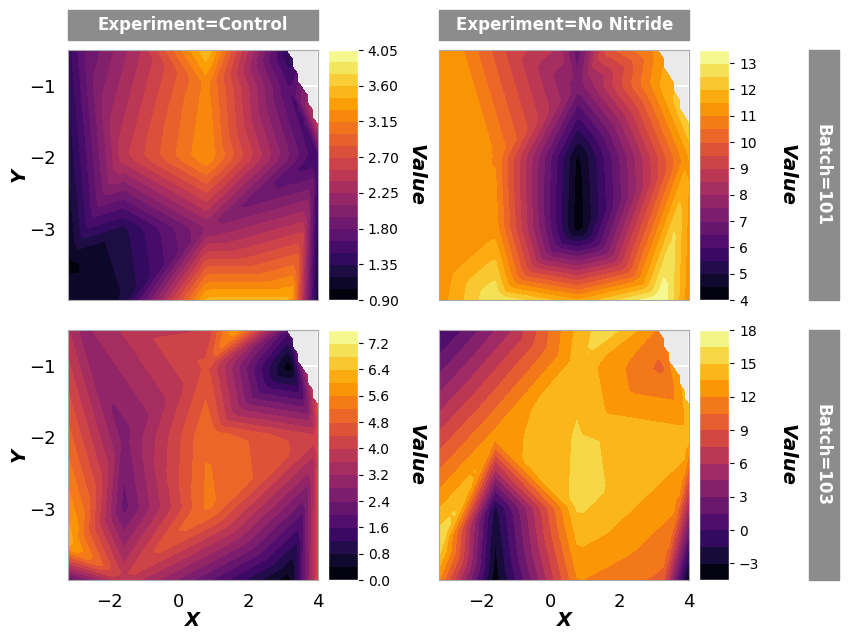

In [46]:
fcp.contour(df=df, x='X', y='Y', z='Value', row='Batch', col='Experiment', filled=True,
            cbar=True, ax_size=[250,250], ymax=3, show=SHOW, 
            rc_label_font_size=12)